In [2]:
# importing libraries
import pandas            as pd                       # data science essentials
import numpy as np                                   # mathematical essentials
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # linear modeling
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import plot_tree                   # tree plots
from sklearn.model_selection import RandomizedSearchCV  # hyperparameter tuning
from sklearn.metrics import make_scorer              # customizable scorer
from sklearn.ensemble import RandomForestClassifier # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm


# loading data
data = '/Users/saidakmalyosinov/Desktop/HULT/Machine Learning/Classification Model Individual Assignment/GOT_character_predictions.xlsx'
game_of_thrones = pd.read_excel(io = data)


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


# displaying the head of the dataset
game_of_thrones.head(n = 5)

,S.No,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveFather,isAliveMother,isAliveSpouse,isAliveHeir,age,popularity,isAlive
0,1,Erreg,King,0,Andal,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN,0.016722,1
1,2,Hugor of the Hill,King of the Andals,1,Andals,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,0.050167,1
2,3,Azor Ahai,NaN,0,Asshai,NaN,NaN,NaN,NaN,NaN,Nissa Nissa,0,1,1,1,1,NaN,NaN,NaN,1.0,NaN,0.117057,1
3,4,Melisandre,NaN,0,Asshai,NaN,NaN,NaN,NaN,R'hllor,NaN,0,1,1,1,1,NaN,NaN,NaN,NaN,NaN,0.745819,1
4,5,Kraznys mo Nakloz,NaN,1,Astapor,NaN,NaN,NaN,NaN,Good Masters,NaN,0,0,1,0,1,NaN,NaN,NaN,NaN,64.0,0.076923,0


In [3]:
# user-defined functions

#########################
# mv_flagger
#########################
def mv_flagger(df):
    """
Flags all columns that have missing values with 'm-COLUMN_NAME'.

PARAMETERS
----------
df : DataFrame to flag missing values


RETURNS
-------
DataFrame with missing value flags."""


    for col in df:

        if df[col].isnull().astype(int).sum() > 0:
            df['m_'+col] = df[col].isnull().astype(int)
            
    return df



#########################
# text_split_feature
#########################
def text_split_feature(col, df, sep=' ', new_col_name='number_of_names'):
    """
Splits values in a string Series (as part of a DataFrame) and sums the number
of resulting items. Automatically appends summed column to original DataFrame.

PARAMETERS
----------
col          : column to split
df           : DataFrame where column is located
sep          : string sequence to split by, default ' '
new_col_name : name of new column after summing split, default
               'number_of_names'
"""
    
    df[new_col_name] = 0
    
    
    for index, val in df.iterrows():
        df.loc[index, new_col_name] = len(df.loc[index, col].split(sep = ' '))

        
        
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('./analysis_images/Feature_Importance.png')

In [4]:
########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

In [5]:
# Implementation of above coded UDF in practice
mv_flagger(game_of_thrones)
text_split_feature('name', game_of_thrones)

# filling empty values
game_of_thrones["age"].fillna(game_of_thrones["age"].mean(), inplace=True) # NaN values in age are replaced with its mean
game_of_thrones.fillna(value=-1, inplace=True) # NaN values are replaced with -1 value

In [6]:
### isAlive variable is the target variable
### correlation between isAlive and other variables
df_corr = game_of_thrones.corr(method = 'pearson').round(decimals = 2)

df_corr['isAlive'].sort_values(ascending = False)



isAlive                       1.00
book2_A_Clash_Of_Kings        0.26
m_dateOfBirth                 0.17
m_mother                      0.14
m_isAliveFather               0.14
m_isAliveSpouse               0.13
m_father                      0.13
m_isAliveMother               0.13
m_heir                        0.13
m_isAliveHeir                 0.06
age                           0.06
m_spouse                      0.06
m_house                       0.05
m_title                       0.05
m_culture                     0.05
book5_A_Dance_with_Dragons    0.01
book3_A_Storm_Of_Swords      -0.01
m_age                        -0.03
isAliveHeir                  -0.04
dateOfBirth                  -0.06
book4_A_Feast_For_Crows      -0.08
number_of_names              -0.09
isAliveSpouse                -0.11
isAliveMother                -0.12
S.No                         -0.12
isAliveFather                -0.14
male                         -0.16
book1_A_Game_Of_Thrones      -0.17
popularity          

In [7]:
# stratifying the response variable

game_of_thrones.loc[ : ,'isAlive'].value_counts(normalize = True).round(decimals = 2)

1    0.73
0    0.27
Name: isAlive, dtype: float64

In [8]:
# declaring explanatory variables 
# below stated variables are dropped, since there is almost no significance, isAlive variable is dropped, since it is target variable
game_of_thrones_data = game_of_thrones.drop(['isAlive', 'S.No', 'name', 'dateOfBirth', 'title',
                     'name', 'mother', 'father', 'spouse', 'heir', 'culture', 'house', 'book5_A_Dance_with_Dragons', 'book3_A_Storm_Of_Swords'], axis = 1)

# declaring response variable
game_of_thrones_target = game_of_thrones.loc[ : , 'isAlive']

In [9]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()

# FITTING the data
scaler.fit(game_of_thrones_data)

# TRANSFORMING the data
game_of_thrones_scaled     = scaler.transform(game_of_thrones_data)

# converting to a DataFrame
game_of_thrones_scaled_df  = pd.DataFrame(game_of_thrones_scaled)

In [10]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            game_of_thrones_data,
            game_of_thrones_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = game_of_thrones_target) # preserving balance


# merging training data for statsmodels
game_of_thrones_train = pd.concat([x_train, y_train], axis = 1)

In [11]:
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")




Response Variable Proportions (Training Set)
--------------------------------------------
1    0.73
0    0.27
Name: isAlive, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.73
0    0.27
Name: isAlive, dtype: float64



In [12]:
# building a model based on hyperparameter tuning results

# INSTANTIATING with best_estimator
forest_tuned = RandomForestClassifier(criterion        = 'gini',
                                      min_samples_leaf = 1,
                                      n_estimators     = 100,
                                      max_depth = 8,
                                      warm_start       = True,
                                      bootstrap        = True,
                                      random_state     = 219)


# FITTING to the FULL DATASET (due to cross-validation)
forest_tuned_fit = forest_tuned.fit(game_of_thrones_data, game_of_thrones_target)


# PREDICTING based on the testing set
forest_tuned_pred = forest_tuned_fit.predict(x_test)


# SCORING the results
print('Model Name: Random Forest')
print('Forest Tuned Training ACCURACY:', forest_tuned.score(x_train, y_train).round(4))
print('Forest Tuned Testing  ACCURACY:', forest_tuned.score(x_test, y_test).round(4))
print('Forest Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                                       y_score = forest_tuned_pred).round(4))


# saving scoring data for future use
forest_tuned_train_score = forest_tuned.score(x_train, y_train).round(4) # accuracy
forest_tuned_test_score  = forest_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
forest_tuned_auc = roc_auc_score(y_true  = y_test,
                                 y_score = forest_tuned_pred).round(4) # auc

Model Name: Random Forest
Forest Tuned Training ACCURACY: 0.8354
Forest Tuned Testing  ACCURACY: 0.8696
Forest Tuned AUC Score        : 0.76



True Negatives : 26
False Positives: 24
False Negatives: 0
True Positives : 134



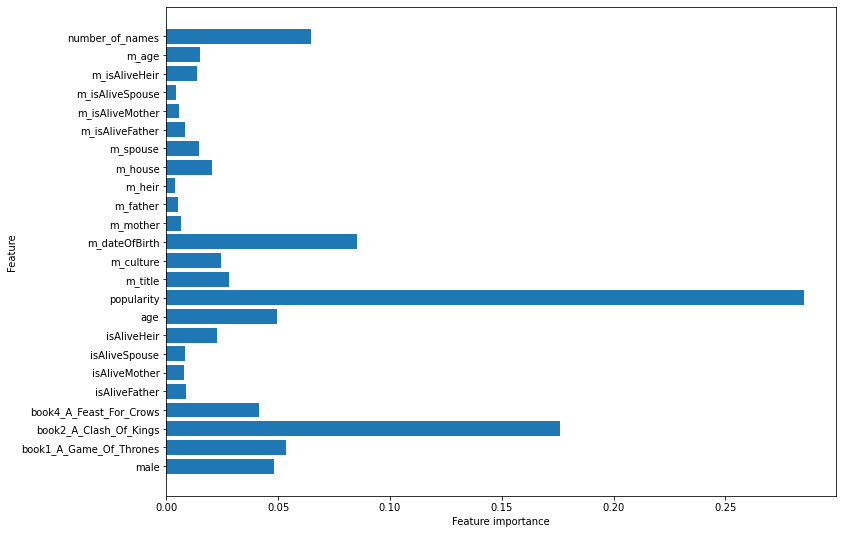

In [13]:
# plotting feature importances
plot_feature_importances(forest_tuned_fit,
                         train = x_train,
                         export = False)

# unpacking the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = y_test, y_pred = forest_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_rf_tn}
False Positives: {tuned_rf_fp}
False Negatives: {tuned_rf_fn}
True Positives : {tuned_rf_tp}
""")

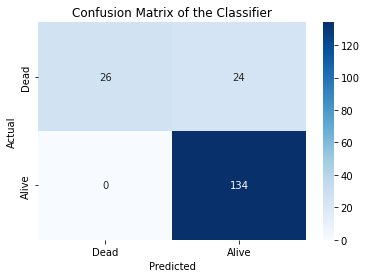

In [14]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = forest_tuned_pred,
          labels = ['Dead', 'Alive'])